In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
iris = pd.read_csv('iris.csv',index_col=0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [5]:
iris.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
146    False
147    False
148    False
149    False
150    False
Length: 150, dtype: bool

In [6]:
iris[iris.duplicated()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
143,5.8,2.7,5.1,1.9,virginica


In [7]:
iris[iris.duplicated()].shape

(1, 5)

In [8]:
iris = iris.drop_duplicates()

In [9]:
iris[iris.duplicated()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


In [10]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: Species, dtype: int64

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [12]:
iris['Species'].value_counts()

0    50
1    50
2    49
Name: Species, dtype: int64

In [13]:
X = iris.iloc[:,0:4]
Y = iris['Species']

In [14]:
iris['Species'].unique()

array([0, 1, 2])

In [15]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [16]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
preds = model.predict(x_test)
preds

array([1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1])

In [20]:
pd.Series(preds).value_counts()

1    12
0    12
2     6
dtype: int64

In [21]:
y_test.value_counts()

0    12
1    10
2     8
Name: Species, dtype: int64

In [22]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,12,0,0
1,0,10,0
2,0,2,6


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.9333333333333333

In [24]:
np.mean(preds==y_test)

0.9333333333333333

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      1.00      0.91        10
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30



In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [27]:
pred = model_gini.predict(x_test)
pred

array([1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2])

In [28]:
pd.Series(pred).value_counts()

0    12
1    11
2     7
dtype: int64

In [29]:
y_test.value_counts()

0    12
1    10
2     8
Name: Species, dtype: int64

In [30]:
pd.crosstab(pred,y_test)

Species,0,1,2
row_0,,,
0,12,0,0
1,0,10,1
2,0,0,7


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9666666666666667

In [32]:
np.mean(pred==y_test)

0.9666666666666667

In [33]:
#Remember This!!!!!!!!!!!!!!
model_gini.score(x_test,y_test)

0.9666666666666667

In [34]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



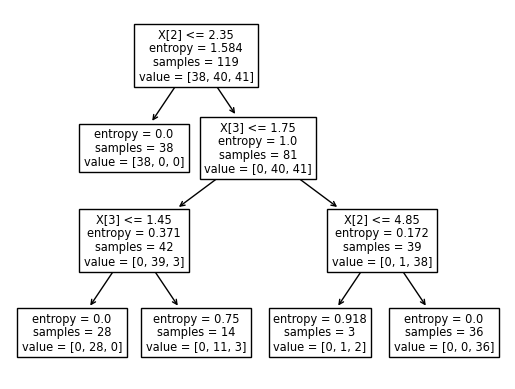

In [35]:
from sklearn import tree
tree.plot_tree(model);

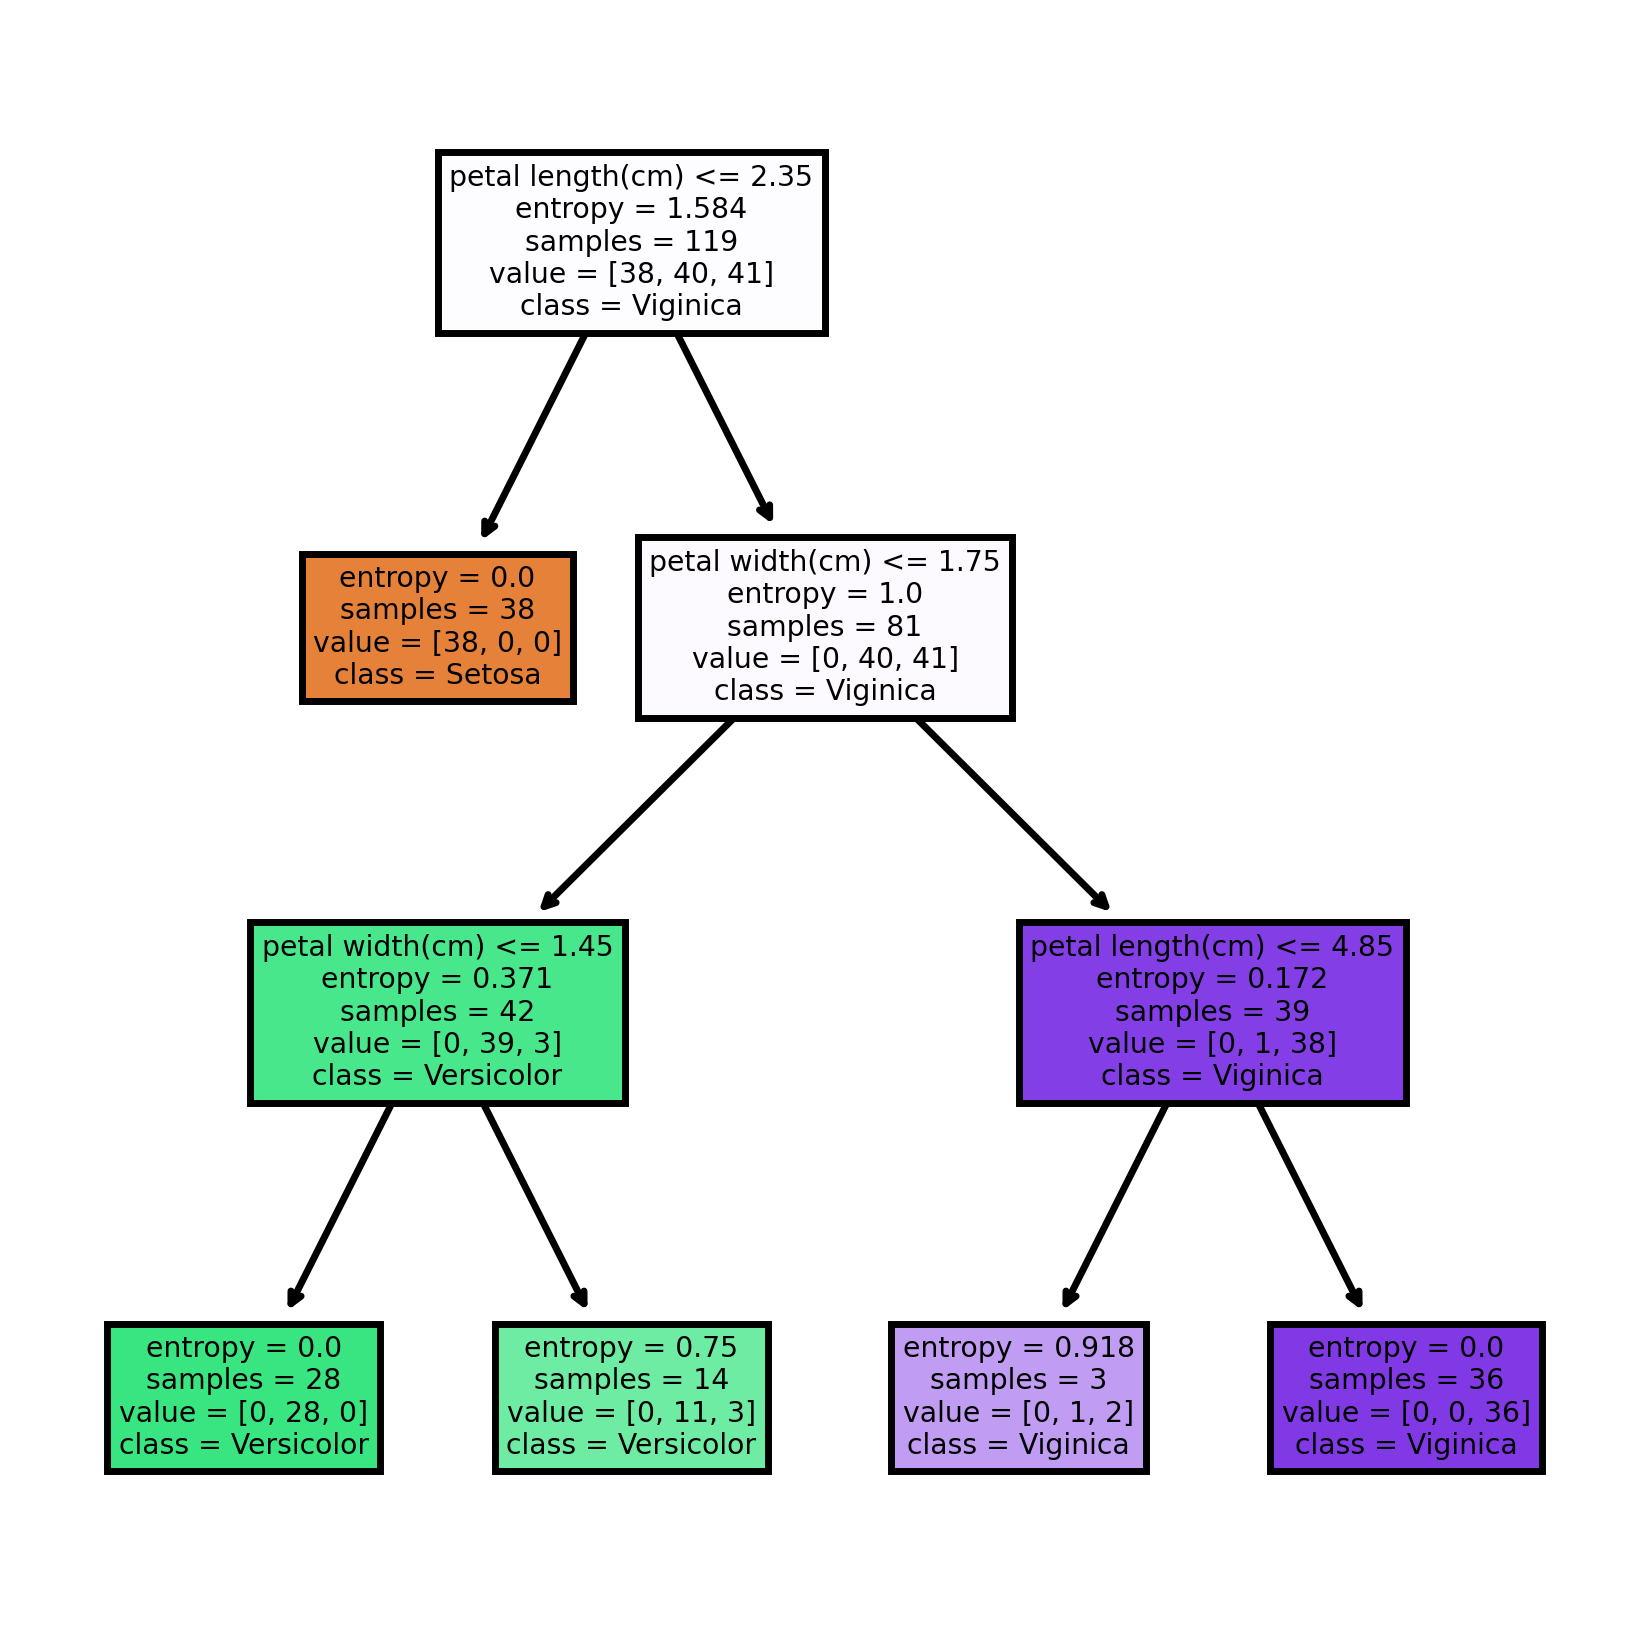

In [36]:
fn = ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn = ['Setosa','Versicolor','Viginica']
fig, axes = plt.subplots(nrows =1, ncols = 1, figsize=(4,4), dpi=500)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled=True);

In [37]:
#Decision Tree Regression
array = iris.values
X = array[:,0:3]
Y = array[:,3]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.33, random_state=0)

In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
model.score(x_test,y_test)

0.9048847217076577